<span style="font-family: Arial; font-size:2.0em;color:black;"> Task-1 Prediction Using Supervised ML </p> 



 <span style="font-family: Arial; font-size:1.0em;color:black;"> LANGUAGE USED-Python, </p> 
 <span style="font-family: Arial; font-size:1.0em;color:black;">LIBRARY USED-Python Scikit Learn </p> 



<span style="font-family: Arial; font-size:1.0em;color:black;"> Objective-To Calculate the score if a student studies 9.25hrs/day </p> 

<span style="font-family: Arial; font-size:1.0em;color:black;">We will be using Simple linear Regression Involving two variables</p> 

In [28]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [29]:
# Reading the file
url = "http://bit.ly/w-data"
df = pd.read_csv(url)


df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [30]:
df.shape


(25, 2)

In [31]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000



<span style="font-family: Arial; font-size:1.5em;color:black;"> Plotting our data </p> 


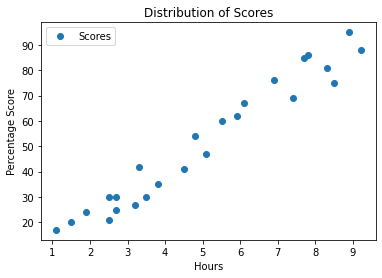

In [32]:
#plotting the number of hours Vs Percentage

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Distribution of Scores')  
plt.xlabel('Hours')  
plt.ylabel('Percentage Score')  
plt.show()

<span style="font-family: Arial; font-size:1.0em;color:black;">From the graph we can see that there is a positive relation</p> 

<span style="font-family: Arial; font-size:1.5em;color:black;"> Dividing our data into training and testing sets</p> 


In [33]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [34]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

<span style="font-family: Arial; font-size:1.5em;color:black;"> Training the algorithm</p> 

In [35]:
from sklearn.linear_model import LinearRegression  
r= LinearRegression()  
r.fit(X_train, y_train) 
print("Training Complete")


Training Complete


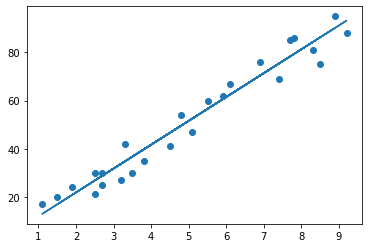

In [36]:
# Plotting the regression line
line = r.coef_*X+r.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:black;"> Predictions</p> 

In [37]:
print(X_test) # Testing data - In Hours
y_pred = r.predict(X_test) # Predicting the scores
print(y_pred)#predictions after training the model

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [38]:
# Comparison between Actual and Predicted Values
for i in range(len(y_pred)):
    df = pd.DataFrame({'Actual': y_test[i], 'Predicted': y_pred[i]},index=[i])
    print(df)

   Actual  Predicted
0      20  16.884145
   Actual  Predicted
1      27  33.732261
   Actual  Predicted
2      69  75.357018
   Actual  Predicted
3      30  26.794801
   Actual  Predicted
4      62  60.491033


<span style="font-family: Arial; font-size:1.5em;color:black;"> Finding out the score for 9.25hrs/day</p> 

In [39]:
hours =np.array(9.25).reshape(1,1)

score = r.predict(hours)
print("If a student studies for 9.25hrs/day,the percentage will be {} ".format(score))

If a student studies for 9.25hrs/day,the percentage will be [[93.69173249]] 


<span style="font-family: Arial; font-size:1.5em;color:black;"> Evaluating the model</p> 

In [40]:
from sklearn import metrics 
print('Mean Absolute error is {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared error is {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score error is {}'.format(metrics.r2_score(y_test, y_pred)))


Mean Absolute error is 4.18385989900298
Mean Squared error is 21.598769307217413
r2_score error is 0.9454906892105355
